In [2]:
import os, sys
import numpy as np
import librosa
import pandas as pd
import plot
import skvideo.io
import skimage.io
from IPython.display import Markdown as md
from moviepy.editor import *

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
Fs = 22050
ann = os.path.join('songs', 'David Bowie - Let\'s Dance.csv')

In [7]:
df = pd.read_csv(ann, keep_default_na=False)

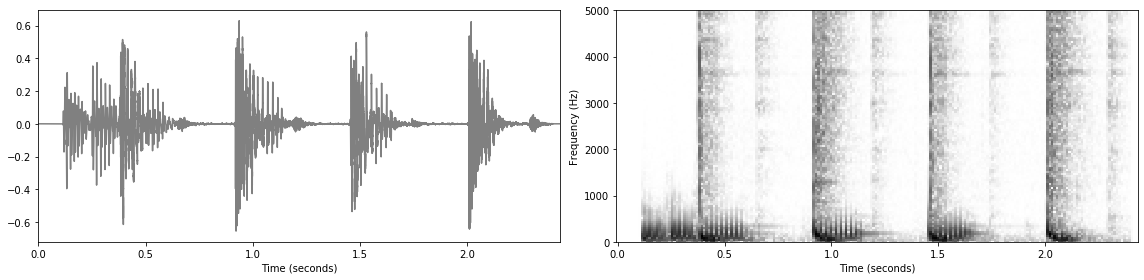

[MoviePy] >>>> Building video video.mp4
[MoviePy] Writing audio in videoTEMP_MPY_wvf_snd.mp3


100%|██████████| 54/54 [00:00<00:00, 1023.10it/s]

[MoviePy] Done.
[MoviePy] Writing video video.mp4



100%|██████████| 58/58 [00:00<00:00, 153.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: video.mp4 



<video controls src="video.mp4"/>

In [3]:
def play_notebook_video(folder, filename):
    '''Plays video in ipython using markdown'''
    file_path=os.path.join(folder, filename)  
    return md('<video controls src="{0}"/>'.format(file_path))

song = os.path.join('songs', 'FMP_C6_F01_Queen.wav')
queen, Fs = librosa.load(song, Fs) 
duration = len(queen)/Fs
plot.plot_wav_spectrogram(song)

num_frames = int(duration * 24)
sequence = np.zeros(num_frames).astype(int)

beats_idx = np.round(df['position'] * 24).astype(int).tolist()

sequence[0] = 1
for i in range(1, num_frames):
    if i in beats_idx:
        sequence[i] = -sequence[i - 1]
    else:
        sequence[i] = sequence[i - 1]

filename = "outputvideo.mp4"
output_path = 'data'
writer = skvideo.io.FFmpegWriter(os.path.join(output_path, filename), outputdict={'-vcodec':'libx264', '-b':'30000000'})
# writer = skvideo.io.FFmpegWriter("outputvideo.mp4")

up = skimage.io.imread(os.path.join('data', 'up.png')) 
down = skimage.io.imread(os.path.join('data', 'down.png')) 

#Write video frame
for x in sequence:
    if x == 1:
        writer.writeFrame(up)
    else:
        writer.writeFrame(down)

writer.close()

clip = VideoFileClip(os.path.join(output_path, filename))

audioclip = AudioFileClip(os.path.join('songs', 'FMP_C6_F01_Queen.wav'))

videoclip = clip.set_audio(audioclip)

videoclip.write_videofile("video.mp4")

md('<video controls src="{0}"/>'.format("video.mp4"))